# EDM Hackathon

## Imports

In [15]:
#Before we start let us import everything we might need!
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from pylab import *
%matplotlib inline
import os.path
import math
import sys
from scipy.stats.stats import pearsonr
import glob #for regular expression
import re
#from pyper import *
import difflib
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm

#set the path where data is stored
FileLoc = '/Users/lalitha_agnihotri/anac/IPyNotebooks/data/'
FileOut = '/Users/lalitha_agnihotri/anac/IPyNotebooks/data/'

pd.set_option('display.max_columns', 50)


In [10]:
#Before we start let us import everything we might need!
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
#import geoip2.database
import sys
from tables import *
from pylab import *
from dateutil import parser
import datetime as dt
%matplotlib inline
import os.path
import time
#set the path where data is stored
FileLoc = ''
from matplotlib.colors import LogNorm
import matplotlib
import scipy.stats
from scipy.stats.stats import pearsonr
from numpy.random import randn
from matplotlib.ticker import FuncFormatter

from scipy import stats
import matplotlib.ticker as mticker


In [11]:
def myPlot(x, numBins, pltRange, xLabel, yLabel ):
    #x = scoreData4['AVERAGELogins']

    # Make a normed histogram. It'll be multiplied by 100 later.
    plt.hist(x, bins=numBins, range=pltRange, normed=True, color='g')

    formatter = mticker.FuncFormatter(lambda v, pos: str(v * 100)+'%')
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

## Get files

In [16]:
FileLoc

'/Users/lalitha_agnihotri/anac/IPyNotebooks/data/'

In [17]:
giftCards = pd.read_csv(FileLoc+'opendata_giftcards.csv',index_col=None, header=0 )
projects = pd.read_csv(FileLoc+'opendata_projects.csv',index_col=None, header=0 )
resources = pd.read_csv(FileLoc+'opendata_resources.csv',index_col=None, header=0 )
essays = pd.read_csv(FileLoc+'opendata_essays.csv',index_col=None, header=0 )


In [105]:
giftCards.head()


,_giftcardid,gift_code_amount,dollar_amount,_buyer_acctid,buyer_city,buyer_state,buyer_zip,date_purchased,_buyer_cartid,_recipient_acctid,recipient_city,recipient_state,recipient_zip,redeemed,date_redeemed,_redeemed_cartid,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched
0,"""aa25a74a3cc0d0f25b8a9b71320e4125""",1,under_10,"""a69307dacaddf0fce6ef0df36d20411e""",Santa Clara,CA,95054,2013-02-28,NaN,"""83f9db1f53cf6b0d991a27b0885ee57b""",NaN,NaN,NaN,t,NaN,"""8d4d1579416c7f0ca486c67d36ba757d""",no_cash_received,f,t,f,f
1,"""e5b78b9aa94f55ea9c16844f77f7127e""",25,10_to_100,"""e80d2ca2ee92f3db24e57fd7d3d0536c""",NaN,GA,NaN,2012-11-28,NaN,"""ddcd32806197b382090fee5caf9b7238""",NaN,,NaN,t,NaN,NaN,no_cash_received,t,f,f,f
2,"""c33771d02842f5beef26ecec7b64b8ed""",100,100_and_up,"""6c4f6f8282b408f9e802061e9385804c""",camarillo,CA,93012,2014-02-28,NaN,"""ddcd32806197b382090fee5caf9b7238""",NaN,,NaN,t,NaN,NaN,no_cash_received,t,f,f,f
3,"""f2521941cb098a7112b79fbf0fea4fa5""",50,10_to_100,"""31da191c1eee297ce8f2c0f4e3654fd4""",NaN,CA,NaN,2012-11-28,NaN,"""ddcd32806197b382090fee5caf9b7238""",NaN,,NaN,t,NaN,NaN,no_cash_received,t,f,f,f
4,"""4254fc1c9a089ac842fde9391f197d62""",200,100_and_up,"""b125c235014befdee6c731769abca206""",Dallas,TX,75287,2014-03-19,NaN,"""ddcd32806197b382090fee5caf9b7238""",NaN,,NaN,t,NaN,NaN,no_cash_received,t,f,f,f


In [8]:
giftCards._giftcardid.nunique()

515864

In [9]:
giftCards._buyer_acctid.nunique() 

242879

In [10]:
giftCards._recipient_acctid.nunique() 

107068

In [107]:
from datetime import datetime
giftCards['Date']  = giftCards['date_purchased'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
giftCards['year'] = giftCards['Date'].apply(lambda x: int(x.strftime("%Y")))

In [108]:
latestGiftCards = giftCards[giftCards.year>2011]

In [109]:
latestGiftCards._buyer_acctid.nunique() 
258947

224659

In [ ]:
state_nums = DataFrame({'count' : giftCards.groupby(["buyer_state"] ).size()}).reset_index().sort(['count'], ascending=False)
state_nums.head(5)

In [103]:
projectsSt.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,...,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration,amtRvsA,success,Date,weekday,weeknum,day,month,year,projectSize,donorSize,resourceType,count_x,stateIndex,count_y,povertyLevel,count_x,primaryFocusSubject,count_y,primaryFocusArea,A
11883,"""c3cbb99b96a1d6984990a9972eb400ab""","""cba839f072ed865f31b9b801322b8ee7""","""b87d1e828d9f1b80f625ef255dc8ace1""",3.600079e+11,40.797416,-73.931111,New York,NY,10035,urban,New York City Dept Of Ed,New York (Manhattan),f,f,f,f,f,f,Ms.,f,t,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,...,completed,2012-01-24,2012-02-07,2012-03-06,2012-06-22,1.176452,0,2012-01-24,1,04,24,1,2012,2,2,0,79898,35,440962,1,232630,15,346468,3,0
12312,"""2828bd55564e073b3c9859e7a1bf24cd""","""b68f0c39dfd6727fe90b51bc0281a947""","""ed047ff4a2b7d048537e32aa1312e949""",3.600153e+11,40.631962,-73.923897,Brooklyn,NY,11234,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,f,f,f,f,Mrs.,f,f,Literacy,Literacy & Language,NaN,NaN,...,completed,2012-01-06,2012-01-24,2012-01-25,2012-06-04,1.088224,0,2012-01-06,4,01,06,1,2012,2,2,0,79898,35,440962,1,232630,15,346468,3,1
12458,"""e7ee7931b4897ac1a5ab824a945144f4""","""1795c924a2753cc2122649d6d4ea6c3f""","""c3a6479367076ac2a7583eb0ceb19b4d""",3.600095e+11,40.648267,-73.946205,Brooklyn,NY,11203,urban,New York City Dept Of Ed,Kings (Brooklyn),f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,NaN,NaN,...,completed,2012-06-29,2012-10-18,2013-02-08,2012-11-26,1.176469,0,2012-06-29,4,26,29,6,2012,3,3,0,79898,35,440962,1,232630,15,346468,3,2
12602,"""42e091db0e393124b99aefd3994f3912""","""470d53ad448aeaa64b4cc4328e87ab45""","""6de658676cb921fe75db656ef4935c67""",3.600088e+11,40.837411,-73.854644,Bronx,NY,10462,urban,New York City Dept Of Ed,Bronx,f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,NaN,NaN,...,completed,2012-01-03,2012-02-08,2012-02-09,2012-06-01,1.176494,0,2012-01-03,1,01,03,1,2012,1,1,0,79898,35,440962,1,232630,15,346468,3,3
12615,"""9ee83b333cfb91d0ada7ad04081378bf""","""d8bfb60e2d04cf3b01bfc986504c7708""","""4033e74be41554df33778321af2c510b""",3.600087e+11,40.859448,-73.909364,Bronx,NY,10453,urban,New York City Dept Of Ed,Bronx,f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,NaN,NaN,...,expired,2012-01-01,NaN,NaN,2012-05-29,0.000000,1,2012-01-01,6,00,01,1,2012,3,3,0,79898,35,440962,1,232630,15,346468,3,4


In [104]:
projectsSt._teacher_acctid.describe()

count                                 401522
unique                                178095
top       "02bccf5c109ace4f3dcbce819a46daa1"
freq                                     162
Name: _teacher_acctid, dtype: object

In [ ]:
projectsSt._projectid.describe()

In [19]:
projects["amtRvsA"] = projects.total_donations/projects.total_price_excluding_optional_support 

In [20]:
projects["success"] = projects.amtRvsA.apply(lambda x: 0 if x<1 else 1) 


In [71]:
from datetime import datetime
projects['Date']  = projects['date_posted'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
projects['weekday'] = projects['Date'].apply(lambda x: int(x.weekday()))
projects['month'] = projects['Date'].apply(lambda x: int(x.strftime("%m")))
projects['year'] = projects['Date'].apply(lambda x: int(x.strftime("%Y")))


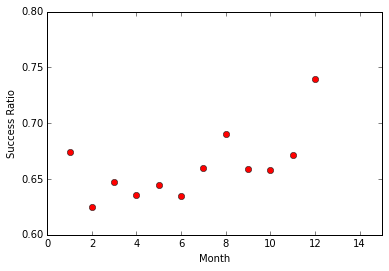

In [22]:
pSizeSuccessMonth = DataFrame({'count' : projects.groupby(["month", "success"]).size()}).reset_index().sort(['month','success'], ascending=False)
pSizeSuccessMonth=pSizeSuccessMonth.set_index(["month", "success"])['count'].unstack('success').reset_index()
pSizeSuccessMonth['sRate'] = pSizeSuccessMonth[1]/(pSizeSuccessMonth[1]+pSizeSuccessMonth[0])
plot(pSizeSuccessMonth.month, pSizeSuccessMonth.sRate, 'ro')
xlim([0,15])
ylim([0.6,0.8])
xlabel('Month')
ylabel('Success Ratio')

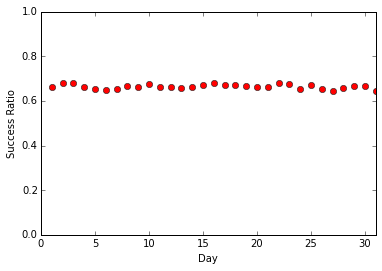

In [129]:

pSizeSuccessDay = DataFrame({'count' : projects.groupby(["day", "success"]).size()}).reset_index().sort(['day','success'], ascending=False)
pSizeSuccessDay=pSizeSuccessDay.set_index(["day", "success"])['count'].unstack('success').reset_index()
pSizeSuccessDay['sRate'] = pSizeSuccessDay[1]/(pSizeSuccessDay[1]+pSizeSuccessDay[0])
plot(pSizeSuccessDay.day, pSizeSuccessDay.sRate, 'ro')
xlim([0,31])
ylim([0,1])
xlabel('Day')
ylabel('Success Ratio')

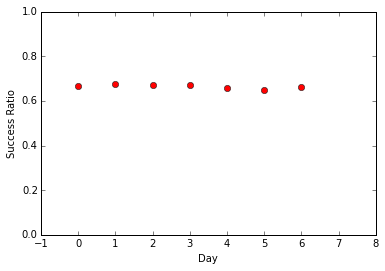

In [131]:
pSizeSuccessWeekday = DataFrame({'count' : projects.groupby(["weekday", "success"]).size()}).reset_index().sort(['weekday','success'], ascending=False)
pSizeSuccessWeekday=pSizeSuccessWeekday.set_index(["weekday", "success"])['count'].unstack('success').reset_index()
pSizeSuccessWeekday['sRate'] = pSizeSuccessWeekday[1]/(pSizeSuccessWeekday[1]+pSizeSuccessWeekday[0])
plot(pSizeSuccessWeekday.weekday, pSizeSuccessWeekday.sRate, 'ro')
xlim([-1,8])
ylim([0,1])
xlabel('Day')
ylabel('Success Ratio')

In [ ]:
pSizeSuccessWeekday = DataFrame({'count' : projects.groupby(["weekday", "success"]).size()}).reset_index().sort(['weekday','success'], ascending=False)
pSizeSuccessWeekday=pSizeSuccessWeekday.set_index(["weekday", "success"])['count'].unstack('success').reset_index()
pSizeSuccessWeekday['sRate'] = pSizeSuccessWeekday[1]/(pSizeSuccessWeekday[1]+pSizeSuccessWeekday[0])
plot(pSizeSuccessWeekday.weekday, pSizeSuccessWeekday.sRate, 'ro')
xlim([-1,8])
ylim([0,1])
xlabel('Day')
ylabel('Success Ratio')

In [23]:
def getProjectBin(x): 
    y = 4
    if (x < 750):
        y = 3
    if (x < 500):
        y = 2
    if (x < 250):
        y = 1
    
    return(y) 

In [24]:
def getDonorBin(x): 
    y = 4
    if (x < 15):
        y = 3
    if (x < 10):
        y = 2
    if (x < 5):
        y = 1
    
    return(y) 

In [25]:
def getResourceType(x): 
    y = 0
    if (x == 'Books'):
        y = 1
    if (x == 'Technology '):
        y = 2
    if (x == 'Trips'):
        y = 3
    if (x == 'Visitors'):
        y = 4
    if (x == 'Other'):
        y = 5
    if (x == 'Supplies'):
        y = 6
        
    
    return(y) 

In [73]:
projects["projectSize"] = projects.total_price_excluding_optional_support.apply(lambda x: getProjectBin(x))
projects["resourceType"] = projects.total_price_excluding_optional_support.apply(lambda x: getResourceType(x))


In [74]:
states= DataFrame({'count' : projects.groupby([ "school_state",] ).size()}).reset_index()
states['stateIndex'] = states.index
states.head()
projectsSt=projects.merge(states,on=['school_state'],how="inner")

In [75]:
poverty= DataFrame({'count' : projects.groupby([ "poverty_level",] ).size()}).reset_index()
poverty['povertyLevel'] = poverty.index
projectsSt=projectsSt.merge(poverty,on=['poverty_level'],how="inner")

In [76]:
pfs= DataFrame({'count' : projects.groupby([ "primary_focus_subject",] ).size()}).reset_index()
pfs['primaryFocusSubject'] = pfs.index
projectsSt=projectsSt.merge(pfs,on=['primary_focus_subject'],how="inner")

In [77]:
pfa= DataFrame({'count' : projects.groupby([ "primary_focus_area",] ).size()}).reset_index()
pfa['primaryFocusArea'] = pfa.index
projectsSt=projectsSt.merge(pfa,on=['primary_focus_area'],how="inner")


In [78]:
pSizeSuccess = DataFrame({'count' : projects.groupby(["projectSize", "success"]).size()}).reset_index().sort(['projectSize','success'], ascending=False)
pSizeSuccess=pSizeSuccess.set_index(["projectSize", "success"])['count'].unstack('success').reset_index()

pSizeSuccess['sRate'] = pSizeSuccess[1]/(pSizeSuccess[1]+pSizeSuccess[0])
pSizeSuccess.head()

success,projectSize,0,1,sRate
0,1,27685,138149,0.833056
1,2,107538,234352,0.685460
2,3,52739,74411,0.585222
3,4,71273,65782,0.479968


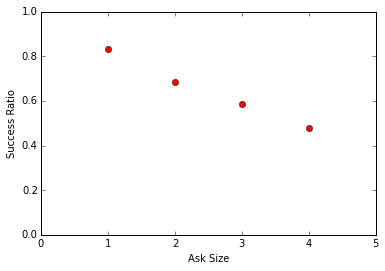

In [79]:
plot(pSizeSuccess.projectSize, pSizeSuccess.sRate, 'ro')
xlim([0,5])
ylim([0,1])
xlabel('Ask Size')
ylabel('Success Ratio')

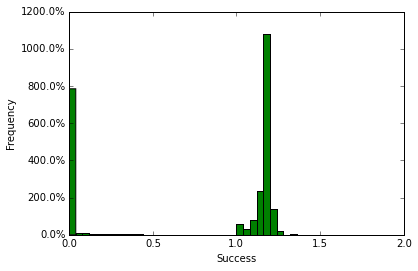

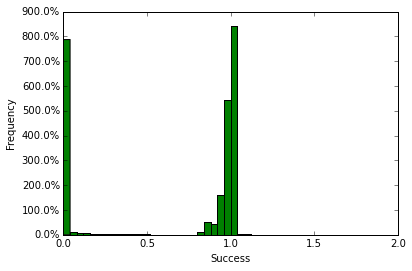

In [39]:

myPlot(projects["amtRvsA"] ,50,[0,2], 'Success', 'Frequency')
myPlot(projects["amtRvsAS"] ,50,[0,2], 'Success', 'Frequency')

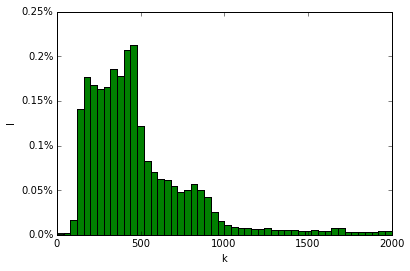

In [50]:
myPlot(projects.total_price_excluding_optional_support, 50, [0, 2000], "k", 'l')

#myPlot(projects["amtRvsA"] ,50,[0,2], 'Success', 'Frequency')

In [52]:
projects.total_price_excluding_optional_support.describe()

count      771929.000000
mean          569.622369
std         11763.963209
min             0.000000
25%           272.600000
50%           418.040000
75%           619.000000
max      10250017.000000
Name: total_price_excluding_optional_support, dtype: float64

### Use the entire dataset to determine weighting of different features

In [80]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [81]:
projectsSt.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,...,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration,amtRvsA,success,Date,weekday,weeknum,day,month,year,projectSize,donorSize,resourceType,count_x,stateIndex,count_y,povertyLevel,count_x,primaryFocusSubject,count_y,primaryFocusArea
0,"""e565fb42185c6e9f22806ad9d5ac8a77""","""2e17c8c91cb58132d8103a9aa8797e80""","""45e7ddbdd7023f1eb65a6cc028d7414f""",3.600090e+11,40.841691,-73.875457,Bronx,NY,10460,urban,New York City Dept Of Ed,Bronx,f,f,f,f,f,f,Mr.,f,f,Literacy,Literacy & Language,NaN,NaN,...,f,completed,2007-03-08,2007-03-08,2007-03-08,2003-12-31,1.099921,1,2007-03-08,3,10,08,3,2007,2,2,0,79898,35,440962,1,232630,15,346468,3
1,"""8b19da4400111a0d63c0d9135b573823""","""760f8b3ac86e3ac286c6e0d4bdd9a039""","""45e7ddbdd7023f1eb65a6cc028d7414f""",3.600090e+11,40.841691,-73.875457,Bronx,NY,10460,urban,New York City Dept Of Ed,Bronx,f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,NaN,NaN,...,f,completed,2002-11-11,2002-12-06,2002-12-06,2003-12-31,1.000000,1,2002-11-11,0,45,11,11,2002,4,4,0,79898,35,440962,1,232630,15,346468,3
2,"""d7a7968d3cda39058b16611841426d1e""","""f7fada7c19ac859803c3dcb0bdd48a1d""","""38ada3531c8f57cab78b0418bbc03e4e""",NaN,40.649586,-73.958322,Brooklyn,NY,11226,NaN,New York City Dept Of Ed,Kings (Brooklyn),f,t,f,f,f,f,Mr.,f,f,Literacy,Literacy & Language,NaN,NaN,...,f,completed,2002-11-11,2002-12-06,2002-12-06,2003-12-31,1.000000,1,2002-11-11,0,45,11,11,2002,4,4,0,79898,35,440962,1,232630,15,346468,3
3,"""8d0506795f2e65c241c55ca99ee58616""","""93b078f573ef1f750226d84d1dca0bd4""","""b5999531e0c1bb628ace29f3bd892e7c""",3.600083e+11,40.850571,-73.933990,New York,NY,10033,urban,New York City Dept Of Ed,New York (Manhattan),f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,NaN,NaN,...,f,completed,2002-11-11,2002-12-06,2002-12-06,2003-12-31,1.063492,1,2002-11-11,0,45,11,11,2002,3,3,0,79898,35,440962,1,232630,15,346468,3
4,"""ad5760956194a58aa4a1e2e325b4fe97""","""1721969ce0202a333c659611021b59e9""","""25a6916107edd02ef794718deda02ba2""",3.600119e+11,40.719657,-73.948446,Brooklyn,NY,11222,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,f,f,f,f,Ms.,t,f,Literacy,Literacy & Language,NaN,NaN,...,f,completed,2002-11-11,2002-12-06,2002-12-06,2003-12-31,1.096419,1,2002-11-11,0,45,11,11,2002,1,1,0,79898,35,440962,1,232630,15,346468,3


In [82]:
projectsSt = projectsSt[projectsSt.year > 2011]
projectTrain = projectsSt[["projectSize", "month", "day",  "resourceType" ,  "success", "stateIndex", "povertyLevel", "primaryFocusArea", "primaryFocusSubject"]]

projectsSt[projectsSt.success == 1].success.count()

262767

In [83]:
projectsSt[projectsSt.success == 0].success.count()

138755

In [92]:

Feature ranking:
1. feature 3 (0.475367) state
2. feature 0 (0.211999)  projectSize
3. feature 1 (0.163040) month
4. feature 6 (0.084784) primaryFocusSubject
5. feature 5 (0.033619) primaryFocusArea
6. feature 4 (0.031192) povertyLevel
7. feature 2 (0.000000) resourceType

X=projectsSt[["projectSize", "month", "resourceType" , "stateIndex", "povertyLevel", "primaryFocusArea", "primaryFocusSubject"]]
y=projectsSt['success']

Feature ranking:
1. feature 3 (0.475367)
2. feature 0 (0.211999)
3. feature 1 (0.163040)
4. feature 6 (0.084784)
5. feature 5 (0.033619)
6. feature 4 (0.031192)
7. feature 2 (0.000000)


(-1, 7)

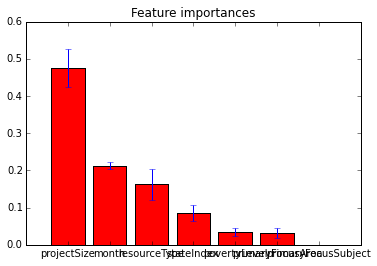

In [94]:
forest =ExtraTreesClassifier(n_estimators=500,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

l = len(indices)
    
# Plot the feature importances of the forest
import pylab as pl
figure()
title("Feature importances")
bar(range(l), importances[indices],
       color="r", yerr=std[indices], align="center")
xticks(range(l), ("projectSize", "month", "resourceType" , "stateIndex", "povertyLevel", "primaryFocusArea", "primaryFocusSubject"))
xlim([-1, l])
#pl.show()

Feature ranking:
1. feature 0 (0.738637)
2. feature 2 (0.129068)
3. feature 3 (0.088826)
4. feature 1 (0.043469)
5. feature 4 (0.000000)


(-1, 5)

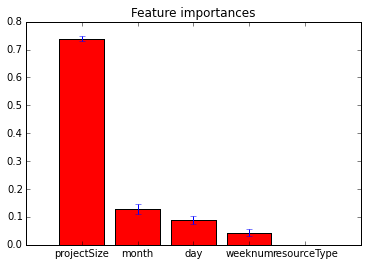

In [211]:

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

l = len(indices)
    
# Plot the feature importances of the forest
import pylab as pl
figure()
title("Feature importances")
bar(range(l), importances[indices],
       color="r", yerr=std[indices], align="center")

xticks(range(l), ("projectSize", "month", "day", "weeknum", "resourceType" , "stateIndex", "povertyLevel"))
xlim([-1, l])
#pl.show()

### Train and test different models

In [95]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rfc
import random 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support 

def runModels(dataSet, featureArray, modelNum):
# 1 for KNN
# 2 for Naive Bayes
# 3 for Logistic Regression
# 4 for random forest
    myFeatures = ''
    for i in (range(len(featureArray))): 
        myFeatures += featureArray[i] + ' ';
    dataSet['A'] = list(range(len(dataSet.index)))  
    testSampleSize = dataSet['A'].nunique()/5
    trainingSampleSize = dataSet['A'].nunique() - testSampleSize
    rows = random.sample(dataSet.A, int(testSampleSize))
    testData = dataSet[dataSet['A'].isin(rows)]
    trainingData = dataSet[dataSet['A'].isin(rows)==False]

   
    X = trainingData[featureArray]
    y = trainingData['success']

    if modelNum == 1:
        modelName = 'KNN'
        clf = neighbors.KNeighborsClassifier(10, weights='uniform') #tried a few numbers for K, 10 gave best results
    
    if modelNum == 2:
        modelName = 'Naive Bayes'
        clf = gnb()

    if modelNum == 3:
        modelName = 'Logistic Regression'
        clf = LogisticRegression()

    if modelNum == 4:
        modelName = 'Random Forest'
        clf = rfc()

    clf = clf.fit(X,y)
    predictions = clf.predict(testData[featureArray])
    real = testData['success']
    #RMSE= round(sqrt(sum(pow((predictions-real),2))/float(len(real))),2) #RMSE=0.290
    a=(predictions-real).tolist().count(1) #predicting "on task" on a "off task" student 
    b=  real.tolist().count(0)
    errOffTask = round(a/float(b),2)
    c=(predictions-real).tolist().count(-1) #predicting "off task" on a "on task"  students
    d=real.tolist().count(1)
    errOnTask =round( c/float(d),2)
    accuracy = round((predictions-real).tolist().count(0)/float(len(real)),2) #overall accuracy
    roc_Auc = roc_auc_score(real, predictions)
    (p, r, f, s) = precision_recall_fscore_support(real, predictions, average='macro')
    print ('Results for '+ modelName)
    print ('Results for '+ myFeatures)
    #print ( 'RMSE = ' + str(RMSE))
    
    print ( 'AUC = ' + str(roc_Auc))
    print ( 'Predicted "success" on a "failure" project: '+ str(a))
    print ('Total "failure" project: '+ str(b))
    print ('Predicted "failure" on a "success" project: '+ str(c))
    print ('Total "success" project: ' + str (d))
    print ('Error failure: '+ str(errOffTask))
    print ('Error success: '+  str(errOnTask))
    print ('Precision: '+  str(p))
    print ('Recall: '+  str(r))
    print ('Overall Accuracy: ' + str(accuracy))


    return (roc_Auc, a, b, c, d, errOffTask, errOnTask, accuracy)

In [98]:
featureSet1= ["projectSize", "month", "resourceType" , "stateIndex", "povertyLevel", "primaryFocusArea", "primaryFocusSubject"]
projectsSt["success"] = projectsSt.amtRvsA.apply(lambda x: 1 if x<1 else 0) 
runModels(projectsSt, featureSet1,1)

Results for KNN
Results for projectSize month resourceType stateIndex povertyLevel primaryFocusArea primaryFocusSubject 
AUC = 0.563168982705
Predicted "success" on a "failure" project: 7048
Total "failure" project: 52507
Predicted "failure" on a "success" project: 20554
Total "success" project: 27797
Error failure: 0.13
Error success: 0.74
Precision: 0.506822475684
Recall: 0.26056768716
Overall Accuracy: 0.66


(0.56316898270454974, 7048, 52507, 20554, 27797, 0.13, 0.74, 0.66)

In [99]:
featureSet1= ["projectSize", "month", "stateIndex", "povertyLevel", "primaryFocusArea", "primaryFocusSubject"]
#projectsSt["success"] = projectsSt.amtRvsA.apply(lambda x: 1 if x<1 else 0) 
runModels(projectsSt, featureSet1,1)

Results for KNN
Results for projectSize month stateIndex povertyLevel primaryFocusArea primaryFocusSubject 
AUC = 0.556927105212
Predicted "success" on a "failure" project: 6517
Total "failure" project: 52339
Predicted "failure" on a "success" project: 21299
Total "success" project: 27965
Error failure: 0.12
Error success: 0.76
Precision: 0.505651217477
Recall: 0.238369390309
Overall Accuracy: 0.65


(0.55692710521216726, 6517, 52339, 21299, 27965, 0.12, 0.76, 0.65)

In [101]:
featureSet1= ["projectSize", "month", "stateIndex", "povertyLevel", "primaryFocusArea", "primaryFocusSubject"]
#projectsSt["success"] = projectsSt.amtRvsA.apply(lambda x: 1 if x<1 else 0) 
runModels(projectsSt, featureSet1,4)

Results for Random Forest
Results for projectSize month stateIndex povertyLevel primaryFocusArea primaryFocusSubject 
AUC = 0.572081720941
Predicted "success" on a "failure" project: 9139
Total "failure" project: 52513
Predicted "failure" on a "success" project: 18948
Total "success" project: 27791
Error failure: 0.17
Error success: 0.68
Precision: 0.491769547325
Recall: 0.318196538448
Overall Accuracy: 0.65


(0.5720817209405672, 9139, 52513, 18948, 27791, 0.17, 0.68, 0.65)

In [97]:
runModels(projectsSt, featureSet1,4)

Results for Random Forest
Results for projectSize month resourceType stateIndex povertyLevel primaryFocusArea primaryFocusSubject 
AUC = 0.575715997572
Predicted "success" on a "failure" project: 18777
Total "failure" project: 27936
Predicted "failure" on a "success" project: 9239
Total "success" project: 52368
Error failure: 0.67
Error success: 0.18
Precision: 0.696685297063
Recall: 0.823575465933
Overall Accuracy: 0.65


(0.57571599757150826, 18777, 27936, 9239, 52368, 0.67, 0.18, 0.65)

In [187]:
featureSet2=  ["projectSize", "month", "day", "weeknum"]
runModels(projectTrain, featureSet2,1)

Results for KNN
Results for projectSize month day weeknum 
RMSE = 0.61
Predicted "success" on a "failure" project 32572
Total "failure" project 51733
Predicted "failure" on a "success" project 23974
Total "success" project 102652
Error failure 0.63
Error success 0.23
Overall Accuracy 0.63


/Users/lalitha_agnihotri/anac/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(0.61, 32572, 51733, 23974, 102652, 0.63, 0.23, 0.63)